## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview




combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Check the number of mice.
mouse_count = len(combine_df["Mouse ID"].unique())
print(mouse_count)


249


In [17]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

#mc_groupby = combine_df.groupby(["Mouse ID","Timepoint"])
#mc_groupby = combine_df.groupby(["Mouse ID"])
#drop_df = combine_df.drop_duplicates(subset = ["Timepoint"])
#tp_list = mc_groupby["Timepoint"].value_counts

drop_df = combine_df.drop_duplicates(["Mouse ID","Timepoint"])

#print(drop_df)


#mouse2_count = len(drop_df["Mouse ID"].unique())
#print(mouse2_count)

#drop_item_df = purchase_data.drop_duplicates(subset = ["Item ID"])


#most popular items grouped by Item ID & Item Name
#mpi_groupby = purchase_data.groupby(['Item ID', "Item Name"])

#calculate sum & count of total purhases
#purchtotal = mpi_groupby["Price"].sum()

#purchcount = mpi_groupby["Purchase ID"].count()
drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Drop any duplicate rows


In [19]:
# Recheck the number of mice
mouse2_count = len(drop_df["Mouse ID"].unique())
print(mouse2_count)

#dl = (drop_df["Drug Regimen"]).unique()
#dl = (drop_df["Drug Regimen"]).value_counts()
dl = (drop_df["Drug Regimen"]).value_counts()
#df2 = df.groupby(['timeIndex'])['isZero'].sum().to_frame('isZero').reset_index()
dl_df = pd.DataFrame(dl)
dl_df = dl_df.reset_index()
len(drop_df)
range(len(drop_df))
len(drop_df)
dl

caplist = (set(drop_df.loc[drop_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].to_list()))

#len(set(drop_df.loc[drop_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].to_list()))





#dl_df = dl_df.value_counts().rename_axis('drug regimen').reset_index(name='counts')
#dl_df

caplist

249


{'b128',
 'b742',
 'f966',
 'g288',
 'g316',
 'i557',
 'i738',
 'j119',
 'j246',
 'l509',
 'l897',
 'm601',
 'm957',
 'r157',
 'r554',
 'r944',
 's185',
 's710',
 't565',
 'u364',
 'v923',
 'w150',
 'w914',
 'x401',
 'y793'}

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

#test = drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)""].agg({'Tumor':['min', 'max','median']})

            

#test3 = drop_df.groupby("Drug Regimen")



test = drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]


test2 = test.agg({'min', 'max', 'median', 'var', 'std', 'sem'})


#titanic[["Sex", "Age"]].groupby("Sex").mean()
#print(test.groups)


#test3.head()
#test3.size()
#len(drop_df)
test2
#test.head()                             

,std,var,max,sem,median,min
Drug Regimen,,,,,,
Capomulin,4.994774,24.947764,48.158209,0.329346,41.557809,23.343598
Ceftamin,6.268188,39.290177,68.923185,0.469821,51.776157,45.000000
Infubinol,6.567243,43.128684,72.226731,0.492236,51.820584,36.321346
Ketapril,8.279709,68.553577,78.567014,0.603860,53.698743,45.000000
Naftisol,8.134708,66.173479,76.668817,0.596466,52.509285,45.000000
Placebo,7.821003,61.168083,73.212939,0.581331,52.288934,45.000000
Propriva,6.568014,43.138803,72.455421,0.525862,50.909965,45.000000
Ramicane,4.846308,23.486704,47.622816,0.320955,40.673236,22.050126
Stelasyn,7.710419,59.450562,75.123690,0.573111,52.431737,45.000000


## Bar and Pie Charts

,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,156


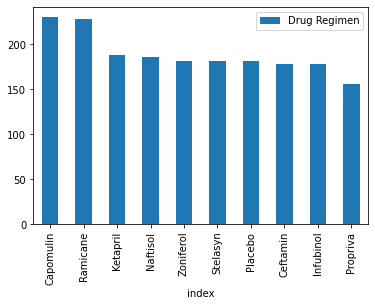

In [21]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

#all = test.shape[0]
#print(all)
#for x in 

dl_df.head()
dl_df = dl_df.rename(columns={})

dl = (drop_df["Drug Regimen"]).value_counts()
#df2 = df.groupby(['timeIndex'])['isZero'].sum().to_frame('isZero').reset_index()
dl_df = pd.DataFrame(dl)
dl_df = dl_df.reset_index()




#drop_df.plot(x="Drug Regimen", y ="Timepoint", kind ="bar" )
dl_df.plot(x="index", y ="Drug Regimen", kind ="bar" )


#plt.show()

#test3 = drop_df.groupby("Drug Regimen")["Timepoint"]

#test3.head()

#test3.plot("Drug Regimen","Timepoint", kind = 'bar')
#test.head(30)
dl_df


,Sex,Mouse ID
0,Female,930
1,Male,958


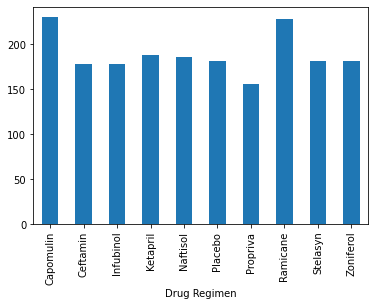

In [22]:
# General identical bar plot using pyplot instead of pandas.

drop_df.groupby("Drug Regimen")["Timepoint"].count().plot(kind='bar')
drop_df.head()
sx_df


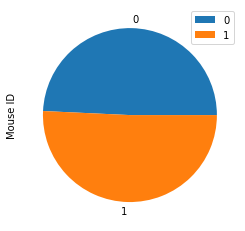

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sx = drop_df.groupby("Sex")["Mouse ID"].count()

sx_df = pd.DataFrame(sx)
sx_df = sx_df.reset_index()

#dl_df = dl_df.value_counts().rename_axis('drug regimen').reset_index(name='counts')
#dl_df

sx_df

sx_df.plot(y="Mouse ID", kind="pie")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


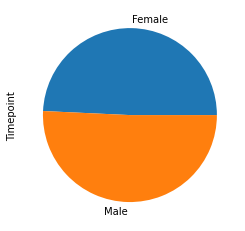

In [24]:
# Generate identical pie plot using pyplot

drop_df.groupby("Sex")["Timepoint"].count().plot(kind='pie')
drop_df.head()
sx_df
drop_df.head()


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin




#dl2 = (drop_df["Drug Regimen"]).value_counts()

#caps = drop_df
#print(cap)



#caps = drop_df.groupby[("Drug Regimen"),("Mouse ID")].groups

#cap_df = pd.DataFrame(cap)
#cap_df = cap_df.reset_index()

#capl = drop_df.groupby("Drug Regimen")["TumorDrug Regimen"].count()

#dl_df = pd.DataFrame(dl)
#dl_df = dl_df.reset_index()
#len(drop_df)
#range(len(drop_df))
#len(drop_df)
#dl



# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#print(capl)
#dl2

#caps = caps.groupby(["Drug Regimen","Mouse ID"])
#caps = drop_df.groupby(["Drug Regimen","Mouse ID","Timepoint"]),["Tumor Volume (mm3)"],["Sex"]

caps = drop_df.groupby(["Mouse ID"])

test3 = caps.agg({'max'})["Timepoint"]

test3 = test3.reset_index()


test3.rename(columns={'max': 'Timepoint'}, inplace=True)


#test3.merge(drop_df,how="left",on =["Mouse ID","Timepoint"])

test3 = test3.merge(drop_df,how="left",on =["Mouse ID","Timepoint"])


#test3
#caps.get_group('Capomulin')

#caps_df = pd.DataFrame(caps)
#caps.size()

#caps_df.head(20)
test3
#len(test3)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [26]:
druglist = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
tumorvol = []
count = 0

captv = []
ramtv = []
inftv = []
ceftv = []


for x in range(len(test3)):
    #print(x)
    #ttt = input('this is x')
    print(test3.iloc[x,2])
    if test3.iloc[x,2]=="Capomulin":
        cap = test3.iloc[x,6]
        #print(cap)
        #tttt = input("this is cap")
        captv.append(cap)
        #print(captv)
    if test3.iloc[x,2]=="Ramicane":
        ram = test3.iloc[x,6]
        #print(cap)
        #tttt = input("this is cap")
        ramtv.append(ram)
    if test3.iloc[x,2]=="Infubinol":
        inf = test3.iloc[x,6]
        #print(cap)
        #tttt = input("this is cap")
        inftv.append(inf)
    if test3.iloc[x,2]=="Ceftamin":
        cef= test3.iloc[x,6]
        #print(cap)
        #tttt = input("this is cap")
        ceftv.append(cef)

        
#print(captv)
#print(ramtv)
#print(inftv)
#print(ceftv)

p = 1
q=1
print(count)

captv_df = pd.DataFrame(captv)
print(captv_df)
fff = input("this is the captv df")
captv_df.columns = ["tumor"]

print(captv_df)
fff = input("this is the captv df")


quartiles = captv_df["tumor"].quantile([.25,.5,.75])


#quartiles = captv_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")







# The second example again looks at the LAX temperature data set and computes quantiles
#temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
#temperatures = temperature_df['HourlyDryBulbTemperature']






#test3.loc[[test3["Drug Regimen"] == 'Capomulin',:]]:
#    count = +count




#for drugs in druglist:
#    print(drugs)
    #ttt = input("this is the first drg")
#    for x in range(len(test3)):
#        if test3.loc[["Drug Regimen"] == drugs,:]:
#            print(yes)
#            tumorvol.append(x,"Tumor Volume (mm3)")
#    print(tumorvol)
#Capomulin, Ramicane, Infubinol, and Ceftamin



Infubinol
Infubinol
Placebo
Ceftamin
Stelasyn
Zoniferol
Ramicane
Ramicane
Ketapril
Stelasyn
Ramicane
Infubinol
Ramicane
Infubinol
Propriva
Zoniferol
Naftisol
Placebo
Stelasyn
Capomulin
Zoniferol
Ceftamin
Ceftamin
Naftisol
Capomulin
Ceftamin
Stelasyn
Infubinol
Zoniferol
Placebo
Zoniferol
Infubinol
Stelasyn
Ramicane
Zoniferol
Ketapril
Placebo
Ramicane
Placebo
Ketapril
Ketapril
Infubinol
Propriva
Zoniferol
Zoniferol
Ramicane
Ketapril
Naftisol
Placebo
Naftisol
Infubinol
Naftisol
Ramicane
Zoniferol
Stelasyn
Ketapril
Infubinol
Zoniferol
Ceftamin
Zoniferol
Ketapril
Capomulin
Naftisol
Ketapril
Capomulin
Zoniferol
Capomulin
Ketapril
Propriva
Propriva
Ramicane
Stelasyn
Propriva
Ketapril
Stelasyn
Ketapril
Ceftamin
Ramicane
Ramicane
Infubinol
Placebo
Capomulin
Propriva
Placebo
Capomulin
Stelasyn
Capomulin
Placebo
Capomulin
Ceftamin
Zoniferol
Naftisol
Ramicane
Stelasyn
Ramicane
Ceftamin
Ketapril
Ramicane
Infubinol
Stelasyn
Propriva
Zoniferol
Infubinol
Stelasyn
Zoniferol
Propriva
Ketapril
Ceftamin
C

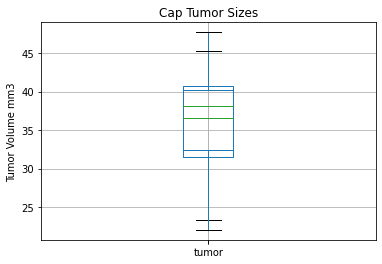

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

#captv_df

# The second example again looks at the LAX temperature data set and computes quantiles
#temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
#temperatures = temperature_df['HourlyDryBulbTemperature']

#fig1, ax1 = plt.subplots()
#ax1.set_title('Cap Tumor Sizes')
#ax1.set_ylabel('Tumor Volume mm3')
#captv_df.boxplot(column = ["tumor"])

#plt.show()

ramtv_df = pd.DataFrame(ramtv)
#print(captv_df)
#fff = input("this is the captv df")
ramtv_df.columns = ["tumor"]

#print(captv_df)
#fff = input("this is the captv df")




fig1, ax1 = plt.subplots()

ax1.set_title('Cap Tumor Sizes')
ax1.set_ylabel('Tumor Volume mm3')
captv_df.boxplot()

ramtv_df.boxplot()

#fig2, ax2 = plt.subplots()
#ax2.set_title('Ram Tumor Sizes')
#ax2.set_ylabel('Tumor Volume mm3')
#ramtv_df.boxplot()

#plt.boxplot([captv_df,ramtv_df])



#dat = (captv_df,ramtv_df)

#ax3.boxplot(dat)
#fig3, ax3 = plt.subplots()




plt.show()






## Line and Scatter Plots

u364


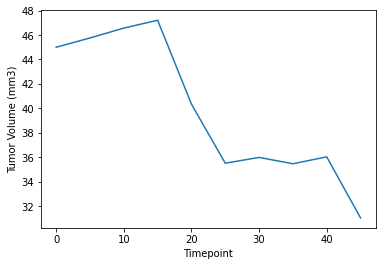

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2
99,u364,Capomulin,Male,18,17,20,40.343948,2
100,u364,Capomulin,Male,18,17,25,35.503616,2
101,u364,Capomulin,Male,18,17,30,35.978334,2
102,u364,Capomulin,Male,18,17,35,35.459490,2
103,u364,Capomulin,Male,18,17,40,36.024138,2
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin





drop_df.head()

#test4 = drop_df.groupby("Mouse ID")["Drug Regimen", "Tumor Volume (mm3)", "Weight (g)", "Timepoint"].to_list()

#pd.DataFrame(test4.size().reset_index(name = "id"))

#(set(drop_df.groupby("Mouse ID")["Drug Regimen", "Tumor Volume (mm3)", "Weight (g)", "Timepoint"].to_list()))


#caps = drop_df.groupby(["Mouse ID"])

#test3 = caps.agg({'max'})["Timepoint"]

#test3 = test3.reset_index()


#test3.rename(columns={'max': 'Timepoint'}, inplace=True)

#(set(drop_df.loc[drop_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].to_list()))

#len(set(drop_df.loc[drop_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].to_list()))

cap_a = drop_df.loc[drop_df["Drug Regimen"] == "Capomulin"]

random_mouse = cap_a.iloc[44,0]

print(random_mouse)


cap_id = drop_df.loc[drop_df["Mouse ID"] == random_mouse]

x_axis = cap_id["Timepoint"]
y_axis = cap_id["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

cap_id

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen



## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



# Observations and Insights